In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop(labels=["Cabin","Ticket"], axis = 1, inplace = True)


In [9]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

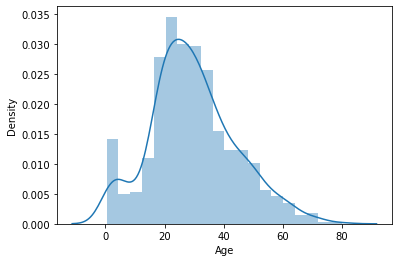

In [10]:
copy = df.copy()
copy.dropna(inplace=True)
sns.distplot(copy["Age"])

In [11]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna("S", inplace=True)

In [12]:
pd.isnull(df).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## sex plot

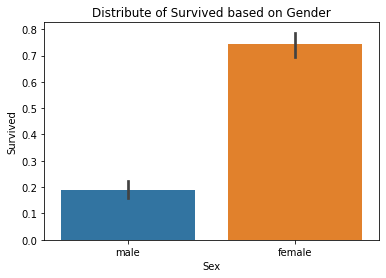

In [13]:
sns.barplot(x="Sex" , y="Survived",data=df)
plt.title("Distribute of Survived based on Gender")
plt.show()

In [14]:
total_survived_female = df[df.Sex == "female"]["Survived"].sum()
total_survived_Male = df[df.Sex == "male"]["Survived"].sum()

print("total people survived is :"+ str((total_survived_female + total_survived_Male)))
print("total female survived is : " ,total_survived_female)
print("Total male survived is : ",total_survived_Male)

total people survived is :342
total female survived is :  233
Total male survived is :  109


## Class plot

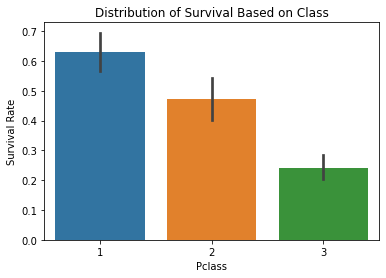

In [15]:
sns.barplot(x="Pclass", y="Survived" , data=df)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

In [16]:
total_survived_one = df[df.Pclass == 1]["Survived"].sum()
total_survived_two = df[df.Pclass == 2]["Survived"].sum()
total_survived_three=df[df.Pclass == 3]["Survived"].sum()
total_survived_class=total_survived_one + total_survived_two + total_survived_three

print("Total survived one",total_survived_one)
print("Total survived two",total_survived_two)
print("Total survived three",total_survived_three)
print("Total survived",total_survived_class)

Total survived one 136
Total survived two 87
Total survived three 119
Total survived 342


Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

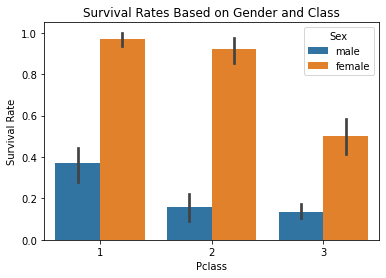

In [17]:
sns.barplot(x="Pclass", y="Survived" , hue="Sex", data = df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

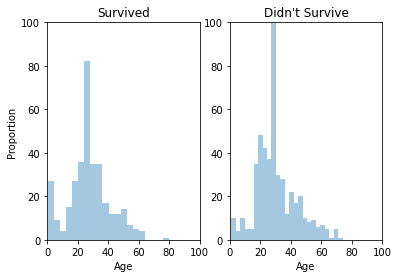

In [18]:
survived_ages = df[df.Survived == 1]["Age"]
not_survived_ages = df[df.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

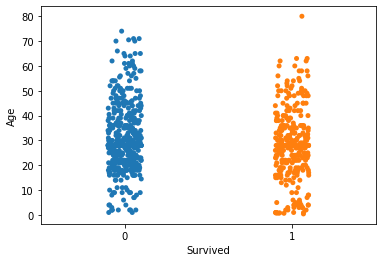

In [19]:
sns.stripplot(x="Survived", y= "Age", data=df, jitter=True)

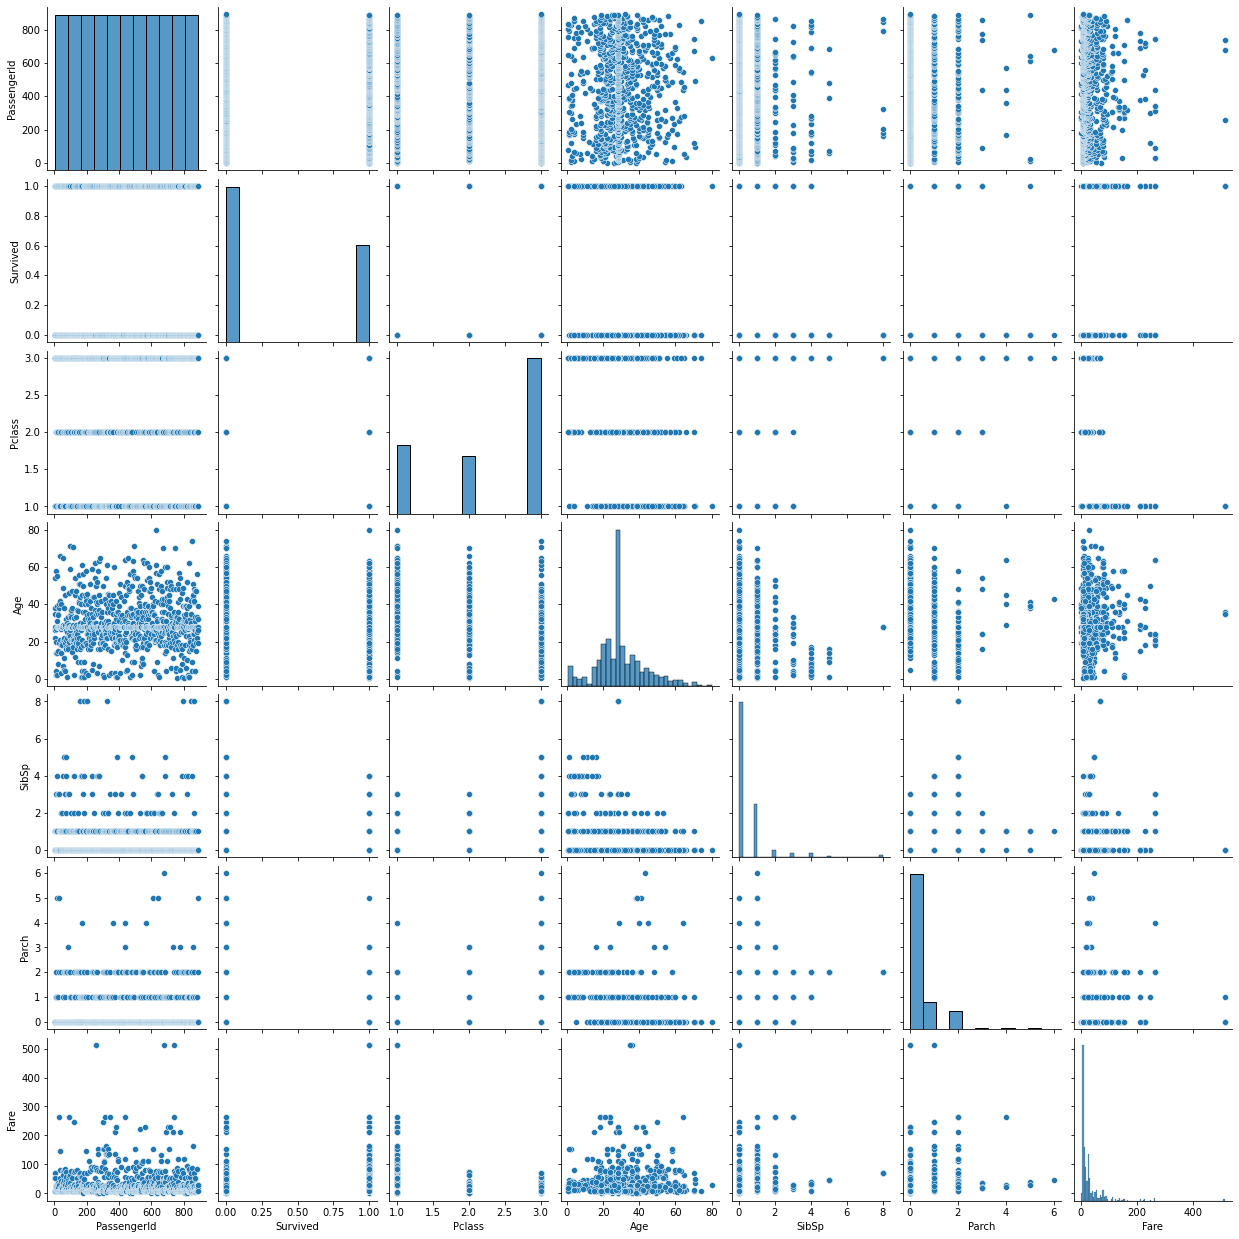

In [20]:
sns.pairplot(df)

In [21]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,26.2500,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,9.8250,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,15.8500,S
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,8.0500,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,39.6875,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,14.4542,C
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,26.5500,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,8.6625,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,7.8958,S


We change Sex to binary, as either 1 for female or 0 for male. We do the same for Embarked.

In [22]:
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2

We can combine SibSp and Parch into one synthetic feature called family size, which indicates the total number of family members on board for each member.

In [23]:
df["FamSize"] = df["SibSp"] + df["Parch"] + 1

This IsAlone feature also may work well with the data we're dealing with, telling us whether the passenger was along or not on the ship.

In [24]:
df["IsAlone"] = df.FamSize.apply(lambda x: 1 if x == 1 else 0)

Although it may not seem like it, we can also extract some useful information from the name column. Not the actual names themselves, but the title of their names like Ms. or Mr. This may also provide a hint as to whether the passenger survived or not. Therefore we can extract this title and then encode it like we did for Sex and Embarked.

In [25]:
for name in df["Name"]:
    df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other", "Rev": "Other", "Dr": "Other"}

df.replace({"Title": title_replacements}, inplace=True)

df.loc[df["Title"] == "Miss", "Title"] = 0
df.loc[df["Title"] == "Mr", "Title"] = 1
df.loc[df["Title"] == "Mrs", "Title"] = 2
df.loc[df["Title"] == "Master", "Title"] = 3
df.loc[df["Title"] == "Other", "Title"] = 4

In [27]:
print(set(df["Title"]))

{0, 1, 2, 3, 4}


In [28]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
821,822,1,3,"Lulic, Mr. Nikola",0,27.0,0,0,8.6625,0,1,1,1
883,884,0,2,"Banfield, Mr. Frederick James",0,28.0,0,0,10.5000,0,1,1,1
91,92,0,3,"Andreasson, Mr. Paul Edvin",0,20.0,0,0,7.8542,0,1,1,1
739,740,0,3,"Nankoff, Mr. Minko",0,28.0,0,0,7.8958,0,1,1,1
550,551,1,1,"Thayer, Mr. John Borland Jr",0,17.0,0,2,110.8833,1,3,0,1


## Model Fitting and Predicting
Now that our data has been processed and formmated properly, and that we understand the general data we're working with as well as the trends and associations, we can start to build our model. We can import different classifiers from sklearn. We will try different types of models to see which one gives the best accuracy for its predictions.

sklearn Models to Test

In [30]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

To evaluate our model performance, we can use the make_scorere and accuracy_score function from sklearn metrics.

In [31]:
from sklearn.metrics import make_scorer, accuracy_score

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
X_train = df[features] #define training features set
y_train = df["Survived"] #define training label set
X_test = df[features] #define testing features set
#we don't have y_test, that is what we're trying to predict with our model


Validation Data Set

Although we already have a test set, it is generally easy to overfit the data with these classifiers.

In [34]:
from sklearn.model_selection import train_test_split #to create validation data set

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

SVC Model

In [36]:
svc_clf = SVC() 
svc_clf.fit(X_train, y_train)
pred_svc = svc_clf.predict(X_test)
acc_svc = accuracy_score(y_test, pred_svc)

print(acc_svc)

0.7262569832402235


Linear Model

In [38]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_train, y_train)
pred_linsvc = linsvc_clf.predict(X_test)
acc_linsvc = accuracy_score(y_test, pred_linsvc)

print(acc_linsvc)

0.6983240223463687


RandomForestClassifier Model

In [39]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.9832402234636871


LogisticRegression Model

In [40]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
pred_logreg = logreg_clf.predict(X_test)
acc_logreg = accuracy_score(y_test, pred_logreg)

print(acc_logreg)

0.8100558659217877


KNeighborsClassifier Model

In [41]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred_knn = knn_clf.predict(X_test)
acc_knn = accuracy_score(y_test, pred_knn)

print(acc_knn)

0.7932960893854749


GaussianNB Model

In [42]:

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
pred_gnb = gnb_clf.predict(X_test)
acc_gnb = accuracy_score(y_test, pred_gnb)

print(acc_gnb)

0.7821229050279329


DecisionTreeClassifier Model

In [43]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)

print(acc_dt)

0.9832402234636871


Evaluating Model Performances

In [46]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.983240
6,Decision Tree,0.983240
3,Logistic Regression,0.810056
4,K Nearest Neighbors,0.793296
5,Gaussian Naive Bayes,0.782123
0,SVC,0.726257
1,Linear SVC,0.698324


It appears that the Random Forest model and Decision Tree works the best with our data